In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math
from sklearn.neighbors import BallTree as BallTree
import cartopy.crs
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LinearSegmentedColormap
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [2]:
colors_operability = [(1,0,0),(1,0,0),(1,0,0),(1,0,0),(255/256,127/256,80/256),(255/256,127/256,80/256),(255/256,255/256,51/256),(255/256,255/256,51/256),(0,204/256,0)]
name='my_list'
cwind ='#00a390'
cwave ='#eb7245'
cig ='#c41e79'
cwpow = '#77d3e9'
cmoperability = LinearSegmentedColormap.from_list(name, colors_operability, N=256)

In [3]:
portnames = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_103ports_d20_w138_s_2_i_005.xlsx')

,Unnamed: 0,name,lon,lat,depth0,shoreN,tm,tp,Ks,Kr,...,operability,frequency,duration,Unnamed: 26,windAvUp.1,swhAvUp.1,igAvUp.1,operability.1,frequency.1,duration.1
0,3,KASIM TERMINAL,130.5,-1.5,51.004303,34.263543,3.532635,4.366173,0.999434,0.998579,...,100.000000,0.000,0.000000,NaN,99.343851,98.857430,99.143776,98.350302,10.775000,12.502260
1,40,PORT KLANG,101.0,3.0,26.068237,282.444284,3.061723,3.333060,0.999585,0.999868,...,100.000000,0.000,0.000000,NaN,97.172641,93.489772,94.876129,91.676696,39.031452,20.798743
2,81,JOHOR,103.5,1.0,20.000000,181.179950,2.462936,2.708393,1.000000,1.000000,...,100.000000,0.000,0.000000,NaN,97.647301,83.590622,85.349939,79.973780,52.447222,35.651346
3,14,JAKARTA,107.0,-5.5,39.067139,352.073115,3.771246,4.388202,0.998632,0.971275,...,99.999430,0.025,2.000000,NaN,95.607787,66.352466,72.286472,62.846468,75.296429,45.497959
4,76,PUERTO LA CRUZ,-65.0,10.5,181.403015,316.059776,4.988678,5.872516,0.988292,0.860186,...,99.998574,0.050,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,44,DURBAN,31.5,-30.0,520.770325,100.624695,8.174529,9.937863,0.926544,0.923192,...,65.421515,119.250,25.418449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,33,RADE DE BREST,-5.0,48.5,84.404083,286.880729,8.254502,10.497063,0.932971,0.979849,...,63.651894,53.800,59.224442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,51,FREMANTLE,115.5,-32.0,54.993469,252.213330,9.585987,12.478249,0.913697,0.972160,...,60.919462,79.025,43.350838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,101,SAN FRANCISCO,-123.0,37.5,345.884033,266.064183,9.355085,11.596368,0.925418,0.973117,...,59.172371,67.500,53.021481,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
largeports = portnames.sort_values(by=['operability'], axis=0, ascending=True)

102        CAPE TOWN
101    SAN FRANCISCO
100        FREMANTLE
99     RADE DE BREST
98            DURBAN
97            FOYNES
96          AUCKLAND
95          BORDEAUX
94            AGADIR
93          CHI-LUNG
Name: name, dtype: object

Text(0.5, 1.0, '103 large ports to define hotspots and their main cause')

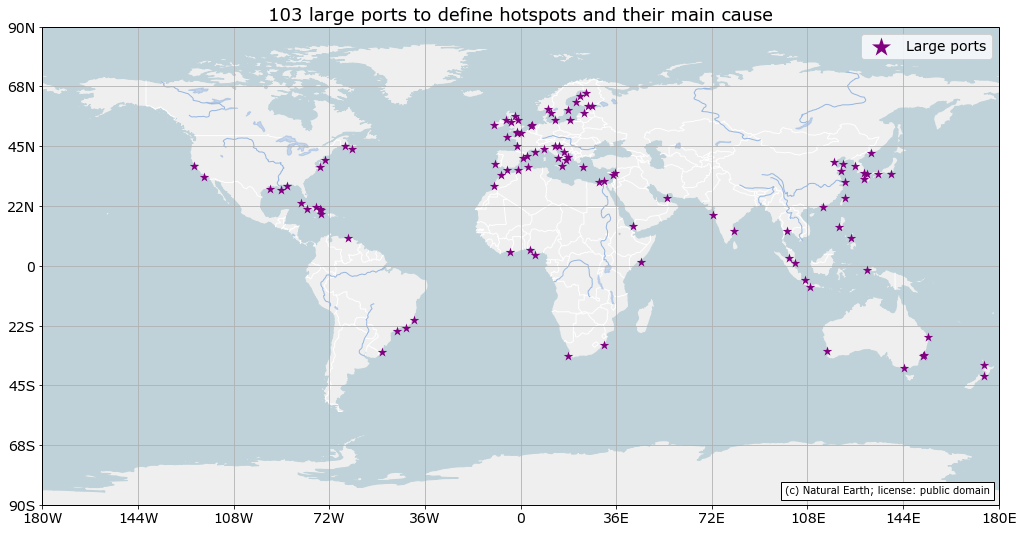

In [9]:
## 103 ports globally
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
#pc = ax.scatter(newports['lon'],newports['lat'], c=newports['wind95'], s=20, cmap=cmwind)#, cmap='RdYlGn_r')
ax.scatter(largeports['lon'], largeports['lat'], c='purple', lw=0, marker='*', s=100, alpha=1, zorder=10, label='Large ports')      
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis='both', labelsize=14) #  which='both',
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
ax.legend(loc='upper right', fontsize=14, markerscale=2)

ax.set_title('103 large ports to define hotspots and their main cause', fontsize=18)
#plt.savefig('103 large ports for hotspot analysis.png', dpi=300, bbox_inches='tight');

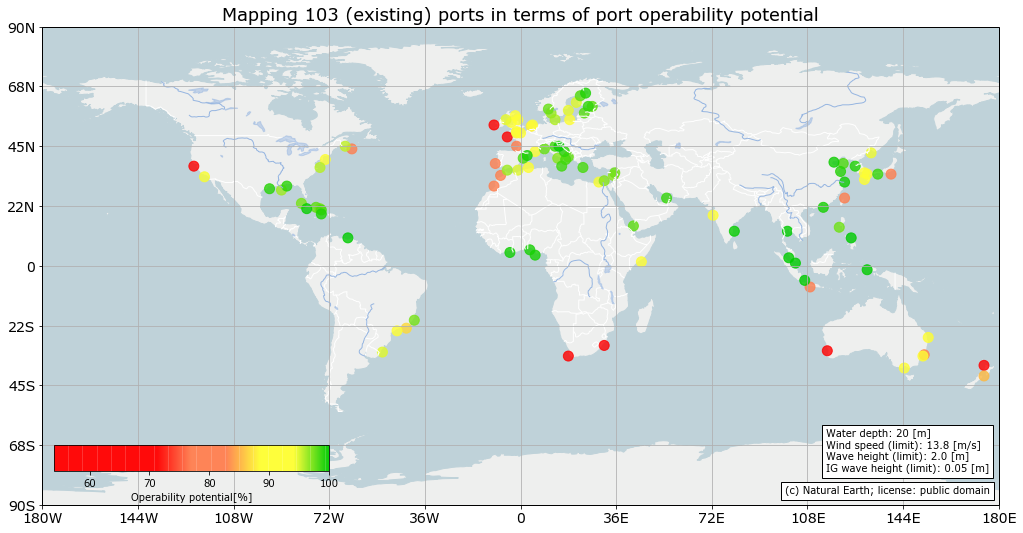

In [9]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

pc = ax.scatter(largeports['lon'],largeports['lat'], c=largeports['operability'], s=100, cmap=cmoperability, alpha=0.8)#, cmap='RdYlGn_r')

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
ax.set_title('Mapping 103 (existing) ports in terms of port operability potential', fontsize=18)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability potential[%]', orientation='horizontal')
#custom_lines = [Line2D([0], [0], lw=0, marker='o', markerfacecolor=(0,204/256,0), markeredgecolor=(0,204/256,0), markeredgewidth=0, alpha=0.9, markersize=14),
#                Line2D([0], [0], lw=0, marker='o', markerfacecolor=(255/256,255/256,51/256), markeredgecolor=(255/256,255/256,51/256), markeredgewidth=0, alpha=0.9, markersize=14),
#                Line2D([0], [0], lw=0, marker='o', markerfacecolor=(255/256,127/256,80/256), markeredgecolor=(255/256,127/256,80/256), markeredgewidth=0, alpha=0.9, markersize=14),
#                Line2D([0], [0], lw=0, marker='o', markerfacecolor=(1,0,0), markeredgecolor=(1,0,0), markeredgewidth=0, alpha=0.9, markersize=14)]

#legend2 = plt.legend(custom_lines, ['> 95', '85 - 95', '75 - 85', '< 75'], loc='lower left', borderpad = 1, title='Operability [%]', fontsize=14, bbox_to_anchor=(0.001,0.001,0.239,0.04),labelspacing=0.8)
#legend2.get_title().set_fontsize('14')
#ax.add_artist(legend2)
        
plt.savefig('global_port_operability_map_large_ports_combined_unique6.png', dpi=300, bbox_inches='tight');

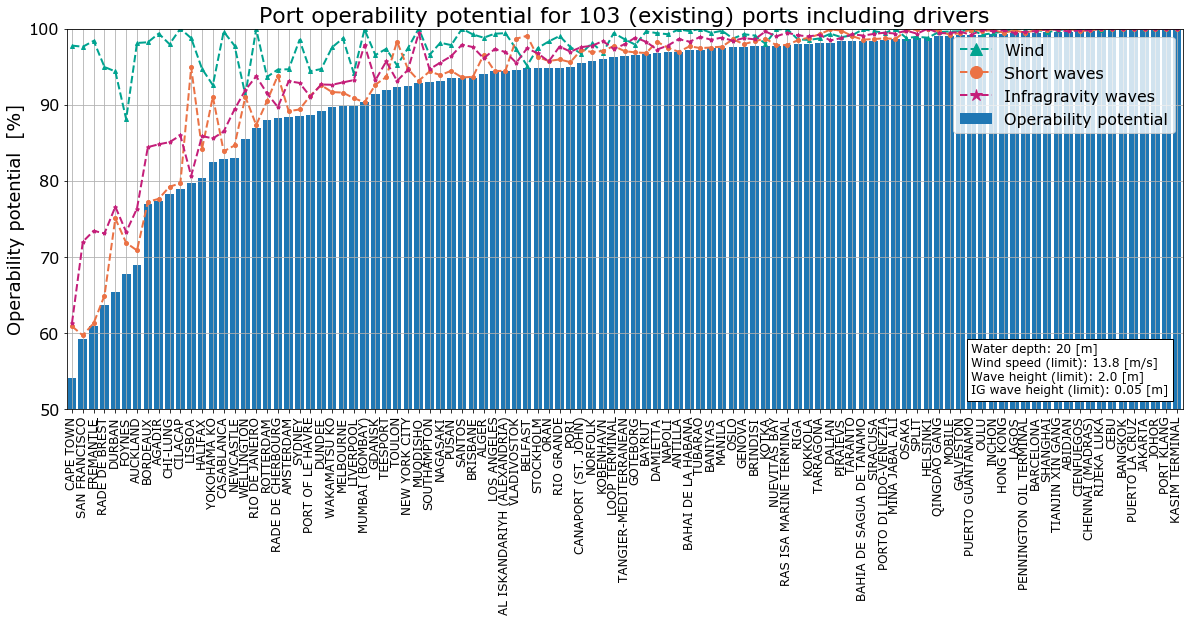

In [7]:
labels = largeports.name.loc[:]
width = 0.8
x = np.arange(0.5,103.5,1)
fig, ax = plt.subplots(figsize=(20, 7))
#ax.plot(ports6.operability, label='Operability')
ax.bar(x,np.sort(largeports.operability),width, label='Operability potential')
ax.plot(x,largeports.windAvUp, c=cwind, marker='^', linestyle='dashed',linewidth=2, markersize=4, label='Wind')
ax.plot(x,largeports.swhAvUp, c=cwave, marker='o', linestyle='dashed',linewidth=2, markersize=4, label='Short waves')
ax.plot(x,largeports.igAvUp,c=cig, marker='*', linestyle='dashed',linewidth=2, markersize=4, label='Infragravity waves')

ax.grid()
ax.set_xlim(0,103)
ax.set_ylim(50,100)
ax.set_title('Port operability potential for 103 (existing) ports including drivers', fontsize=22)
ax.set_xticklabels(labels, rotation=90, size=12)
ax.set_ylabel('Operability potential  [%]', size=18)
ax.tick_params(axis='y', labelsize=16)
ax.set_xticks(np.arange(0.5, 103.5, step=1));
ax.set_yticks(np.arange(50, 110, step=10));
ax.text(83.5, 52, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.legend(loc='upper right',  fontsize=16, markerscale=3)
plt.savefig('port_operability_curve_103locations_combined_with_drivers_d20_new.png', dpi=300, bbox_inches='tight');

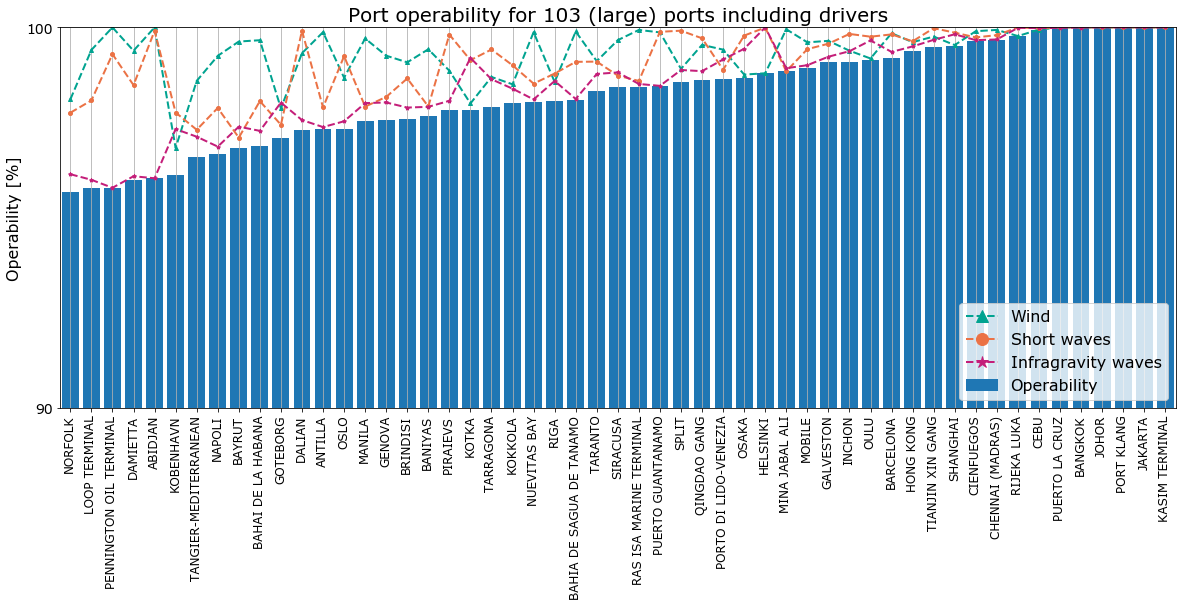

In [36]:
labels = largeports[50:].name.loc[:]
width = 0.8
x = np.arange(50.5,103.5,1)
fig, ax = plt.subplots(figsize=(20, 7))
#ax.plot(ports6.operability, label='Operability')
ax.bar(x,largeports[50:].operability,width, label='Operability')
ax.plot(x,largeports[50:].windAvUp, c=cwind, marker='^', linestyle='dashed',linewidth=2, markersize=4, label='Wind')
ax.plot(x,largeports[50:].swhAvUp, c=cwave, marker='o', linestyle='dashed',linewidth=2, markersize=4, label='Short waves')
ax.plot(x,largeports[50:].igAvUp,c=cig, marker='*', linestyle='dashed',linewidth=2, markersize=4, label='Infragravity waves')

ax.grid()
ax.set_xlim(50,103)
ax.set_ylim(90,100)
ax.set_title('Port operability for 103 (large) ports including drivers', fontsize=20)
ax.set_xticklabels(labels, rotation=90, size=12)
ax.set_ylabel('Operability [%]', size=16)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(np.arange(50.5, 103.5, step=1));
ax.set_yticks(np.arange(90, 110, step=10));
#ax.text(83.5, 52, 'Water depth: 15 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.legend(loc='lower right',  fontsize=16, markerscale=3)
plt.savefig('port_operability_curve_103locations_combined_with_drivers_d15_zoomin.png', dpi=300, bbox_inches='tight');

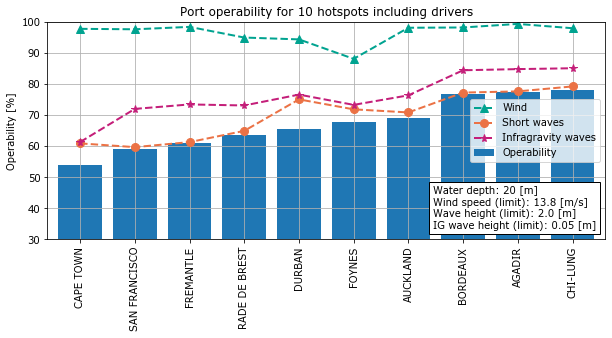

In [10]:
labels = largeports[:10].name.loc[:]
width = 0.8
x = np.arange(0.6,10.6,1)
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid()
ax.bar(x,np.sort(largeports[:10].operability),width, label='Operability')
ax.plot(x,largeports[:10].windAvUp, c=cwind, marker='^', linestyle='dashed',linewidth=2, markersize=8, label='Wind')
ax.plot(x,largeports[:10].swhAvUp, c=cwave, marker='o', linestyle='dashed',linewidth=2, markersize=8, label='Short waves')
ax.plot(x,largeports[:10].igAvUp,c=cig, marker='*', linestyle='dashed',linewidth=2, markersize=8, label='Infragravity waves')

ax.set_xlim(0,10.2)
ax.set_ylim(30,100)
ax.set_title('Port operability for 10 hotspots including drivers', fontsize=12)
ax.set_xticklabels(labels, rotation=90, size=10)
ax.set_ylabel('Operability [%]', size=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticks(np.arange(0.6, 10.6, step=1));
ax.set_yticks(np.arange(30, 110, step=10));
ax.legend(loc='center right',  fontsize=10, markerscale=1)
ax.text(7.05, 33.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=10)
plt.savefig('port_operability_curve_103locations_hotspots_with_driversB.png', dpi=300, bbox_inches='tight');

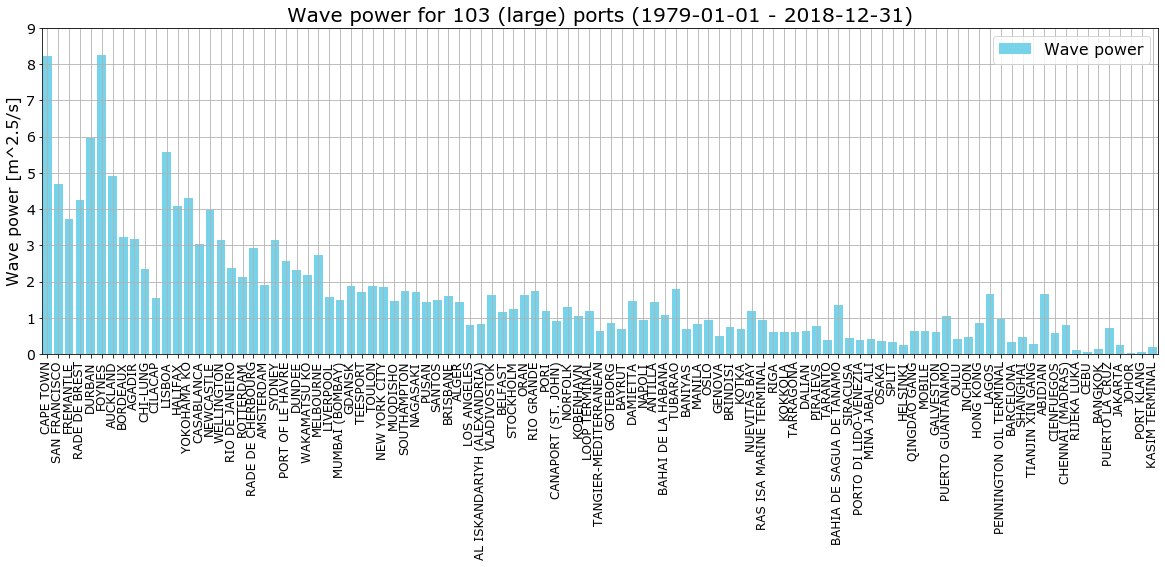

In [18]:
## Wave power
width = 0.8  # the width of the bars
labels = largeports.name.loc[:]
x = np.arange(0.5,103.5,1)
fig, ax = plt.subplots(figsize=(20, 6))
ax.grid()
ax.bar(x,largeports.wavePo,width,color=cwpow, label='Wave power')
ax.set_xlim(0,103)
ax.set_ylim(0,9)
ax.set_title('Wave power for 103 (large) ports (1979-01-01 - 2018-12-31)', fontsize=20)
ax.set_ylabel('Wave power [m^2.5/s]', size=16)
ax.set_xticklabels(labels, rotation=90, size=12)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(np.arange(0.5, 103.5, step=1));
ax.legend(loc='upper right', fontsize=16)
#plt.savefig('wave_power_103_ports2.png', dpi=300, bbox_inches='tight');

In [98]:
hotspots = largeports.iloc[:10,:]
hotspots.to_excel('output_hotspots_d20_w138_s_2_i_005.xlsx')

In [109]:
highoperability = largeports[largeports['operability']>=95]
lowoperability = largeports[largeports['operability']<95]
lowoperability

,Unnamed: 0,name,lon,lat,depth0,shoreN,tm,tp,Ks,Kr,...,ig50,ig95,igAv,wavePo,windAvUp,swhAvUp,igAvUp,operability,frequency,duration
64,64,CAPE TOWN,18.0,-34.0,193.355347,273.511034,9.502471,11.865600,0.923775,0.885805,...,0.040806,0.141948,61.596509,8.236734,97.756959,60.875827,61.313598,54.063712,81.300,49.529828
101,101,SAN FRANCISCO,-123.0,37.5,345.884033,266.064183,9.355085,11.596368,0.925418,0.973117,...,0.031112,0.112663,72.294376,4.699824,97.607518,59.670317,71.982660,59.172371,67.500,53.021481
51,51,FREMANTLE,115.5,-32.0,54.993469,252.213330,9.585987,12.478249,0.913697,0.972160,...,0.032360,0.111002,73.631930,3.737435,98.384953,61.287075,73.418321,60.919462,79.025,43.350838
33,33,RADE DE BREST,-5.0,48.5,84.404083,286.880729,8.254502,10.497063,0.932971,0.979849,...,0.023688,0.176122,73.290840,4.237448,94.948950,64.911875,73.082934,63.651894,53.800,59.224442
44,44,DURBAN,31.5,-30.0,520.770325,100.624695,8.174529,9.937863,0.926544,0.923192,...,0.031664,0.088326,77.008042,5.964938,94.358031,75.043920,76.583105,65.421515,119.250,25.418449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,KOTKA,27.0,60.0,20.000000,171.585741,3.348717,3.694182,0.999048,1.000000,...,0.009697,0.031422,99.618176,0.694683,98.001502,98.680061,99.614601,97.690108,18.450,8.754743
91,91,NUEVITAS BAY,-77.0,22.0,952.995667,23.347376,4.784670,5.665984,0.991681,0.991437,...,0.011739,0.035524,98.999258,1.188751,99.873374,97.806867,98.969884,97.762377,11.025,17.791383
34,34,RAS ISA MARINE TERMINAL,42.5,15.0,96.159241,214.242144,4.283582,5.110862,0.993981,0.996620,...,0.005310,0.035314,99.460700,0.944172,99.933265,97.843087,99.448722,97.796030,14.400,13.416667
6,6,RIGA,24.0,57.5,34.001068,258.712001,3.448883,3.918817,0.998498,0.996417,...,0.007887,0.031844,99.126148,0.617953,98.566350,98.459089,99.112238,97.971933,16.600,9.881024


Text(0.5, 1.0, 'Main causes for port operability risks for 103 (large) ports (1979-01-01 - 2018-12-31)')

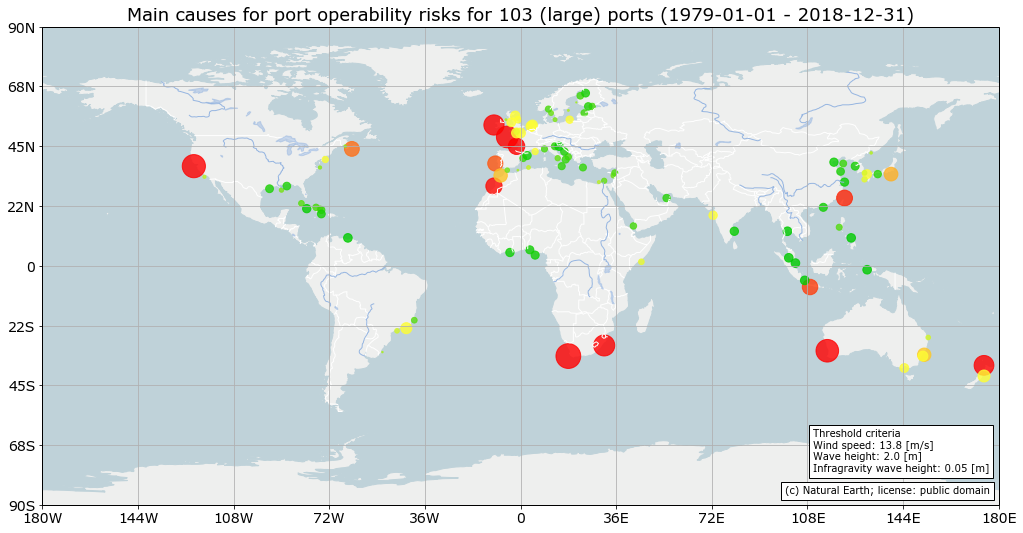

In [100]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

pc = ax.scatter(largeports['lon'],largeports['lat'], c=largeports['operability'], s=15*np.abs(95-largeports['operability']), cmap=cmoperability, alpha=0.8)#, cmap='RdYlGn_r')

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(110, -77.5, 'Threshold criteria \nWind speed: 13.8 [m/s] \nWave height: 2.0 [m] \nInfragravity wave height: 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
ax.set_title('Main causes for port operability risks for 103 (large) ports (1979-01-01 - 2018-12-31)', fontsize=18)

#custom_lines = [Line2D([0], [0], lw=0, marker='o', markerfacecolor=(0,204/256,0), markeredgecolor=(0,204/256,0), markeredgewidth=0, alpha=0.9, markersize=10),
#                Line2D([0], [0], lw=0, marker='o', markerfacecolor=(255/256,255/256,51/256), markeredgecolor=(255/256,255/256,51/256), markeredgewidth=0, alpha=0.9, markersize=14),
#                Line2D([0], [0], lw=0, marker='o', markerfacecolor=(255/256,127/256,80/256), markeredgecolor=(255/256,127/256,80/256), markeredgewidth=0, alpha=0.9, markersize=18),
#                Line2D([0], [0], lw=0, marker='o', markerfacecolor=(1,0,0), markeredgecolor=(1,0,0), markeredgewidth=0, alpha=0.9, markersize=25)]

#legend2 = plt.legend(custom_lines, ['> 95', '85 - 95', '75 - 85', '< 75'], loc='lower left', borderpad = 1, title='Operability [%]', fontsize=14, bbox_to_anchor=(0.001,0.001,0.239,0.04),labelspacing=0.8)
#legend2.get_title().set_fontsize('14')
#ax.add_artist(legend2)
        
#plt.savefig('global_port_operability_map_large_ports_combined_unique3.png', dpi=300, bbox_inches='tight');

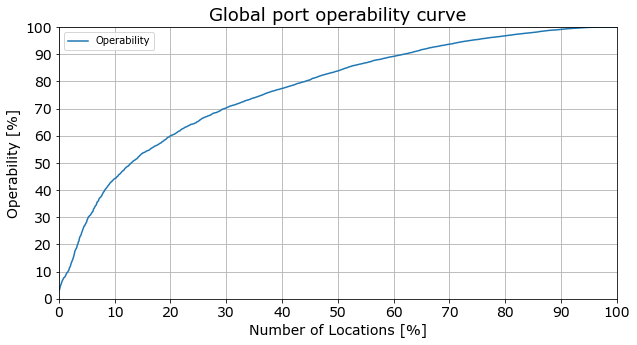

In [373]:
operability = data7.operability.dropna().copy()
x = np.arange(0.001,1.001,0.001)
tot_operability = operability.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability, label='Operability')
ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlabel('Number of Locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend()
#Wellicht nog toevoegen welke thresholds er zijn gebruikt
#plt.savefig('global_port_operability_curve_cum_locations.png', dpi=300, bbox_inches='tight');

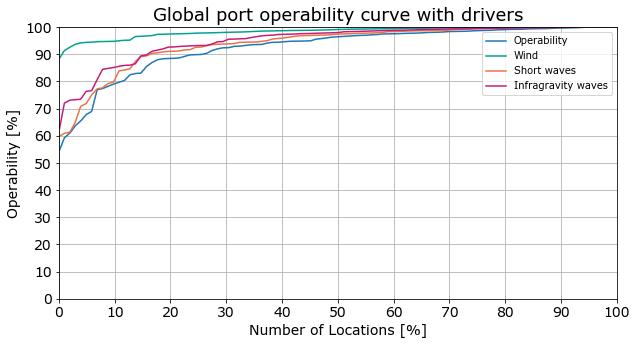

In [26]:
operability = ports6.operability.dropna().copy()
windOP = ports6.windAvUp.dropna().copy()
wavesOP = ports6.swhAvUp.dropna().copy()
igOP = ports6.igAvUp.dropna().copy()

x = np.arange(0.001,1.001,0.001)
total_operability = operability.quantile(q=x)
wind_availability = windOP.quantile(q=x)
waves_availability = wavesOP.quantile(q=x)
infragravity_availability = igOP.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, total_operability, label='Operability')
ax.plot(x*100, wind_availability,c='#00a390', label='Wind')
ax.plot(x*100, waves_availability,c='#eb7245', label='Short waves')
ax.plot(x*100, infragravity_availability, c='#c41e79',label='Infragravity waves')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curve with drivers', fontsize=18)
ax.set_xlabel('Number of Locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend()
#plt.savefig('global_port_operability_curve_cum_locations_with_drivers.png', dpi=300, bbox_inches='tight');

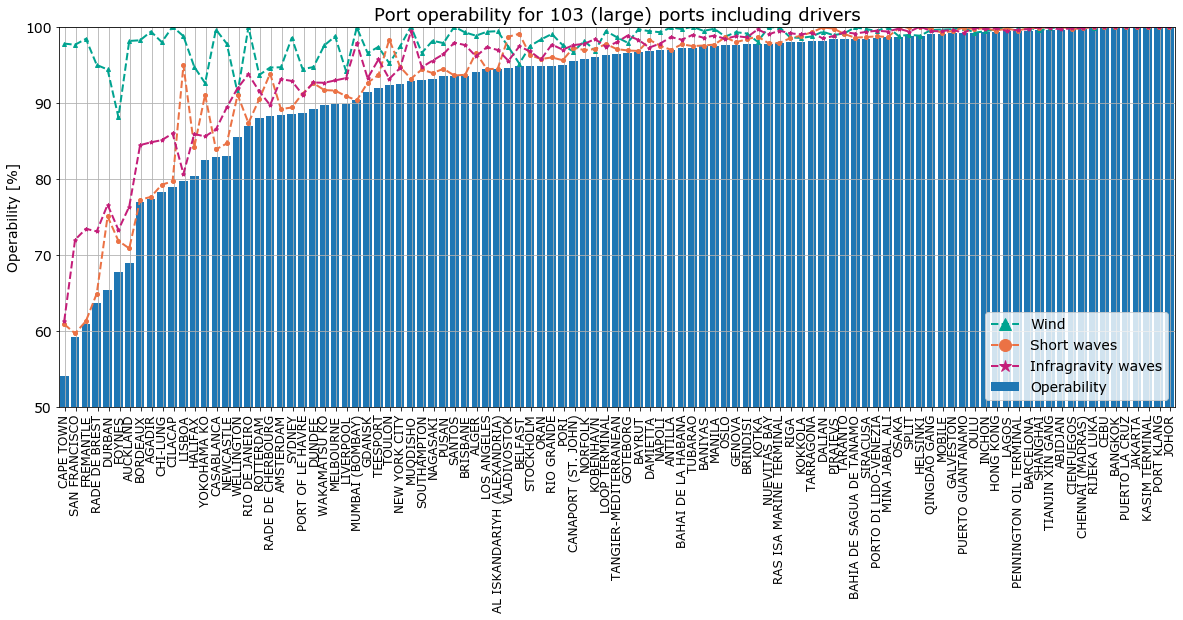

In [28]:
ports6 = ports6.sort_values(by=['operability'], axis=0, ascending=True)

labels = ports6.name.loc[:]
width = 0.8
x = np.arange(0.5,103.5,1)
fig, ax = plt.subplots(figsize=(20, 7))
#ax.plot(ports6.operability, label='Operability')
ax.bar(x,np.sort(ports6.operability),width, label='Operability')
ax.plot(x,ports6.windAvUp, c='#00a390', marker='^', linestyle='dashed',linewidth=2, markersize=4, label='Wind')
ax.plot(x,ports6.swhAvUp, c='#eb7245', marker='o', linestyle='dashed',linewidth=2, markersize=4, label='Short waves')
ax.plot(x,ports6.igAvUp,c='#c41e79', marker='*', linestyle='dashed',linewidth=2, markersize=4, label='Infragravity waves')

ax.grid()
ax.set_xlim(0,103)
ax.set_ylim(50,100)
ax.set_title('Port operability for 103 (large) ports including drivers', fontsize=18)
ax.set_xticklabels(labels, rotation=90, size=12)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(np.arange(0.6, 103.6, step=1));
ax.set_yticks(np.arange(50, 110, step=10));
ax.legend(loc='lower right',  fontsize=14, markerscale=3)
#plt.savefig('port_operability_curve_103locations_combined_with_drivers2.png', dpi=300, bbox_inches='tight');


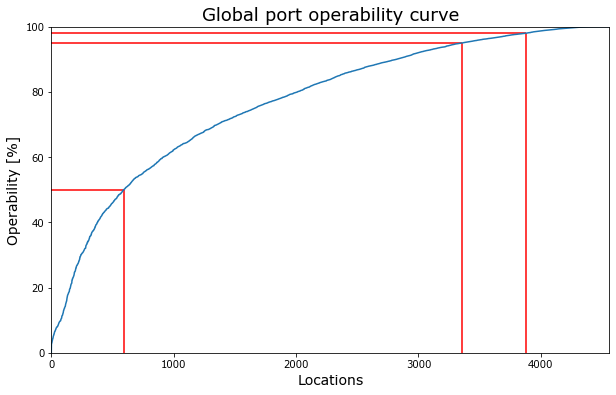

In [333]:
operability = np.sort(data7.operability)
operability[-1] = 0
p50 = np.quantile(operability,0.5)
p95 = np.quantile(operability,0.95)
p98 = np.quantile(operability,0.98)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.sort(data7.operability), label='Operability')
plt.hlines(98,0,find_nearest(operability,98),'r')
plt.hlines(95,0,find_nearest(operability,95),'r')
plt.hlines(50,0,find_nearest(operability,50),'r')
plt.vlines(find_nearest(operability,98),0,98,'r')
plt.vlines(find_nearest(operability,95),0,95,'r')
plt.vlines(find_nearest(operability,50),0,50,'r')
ax.set_ylabel('Operability [%]', size=14)
ax.set_xlabel('Locations', size=14)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlim(0,4560)
ax.set_ylim(0,100)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),fancybox=True, ncol=1, fontsize=14)
#plt.savefig('global_port_operability_curve.png', dpi=300, bbox_inches='tight');

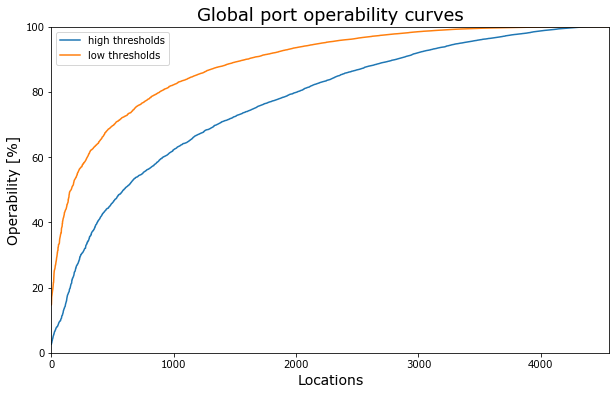

In [217]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.sort(data7.operability), label='high thresholds')
ax.plot(np.sort(data6.operability), label='low thresholds')
ax.set_ylabel('Operability [%]', size=14)
ax.set_xlabel('Locations', size=14)
ax.set_title('Global port operability curves', fontsize=18)
ax.set_xlim(0,4560)
ax.set_ylim(0,100)
ax.legend()#loc='upper center', bbox_to_anchor=(0.5, -0.10),fancybox=True, ncol=1, fontsize=14)
#plt.savefig('global_port_operability_curves_2.png', dpi=300, bbox_inches='tight');

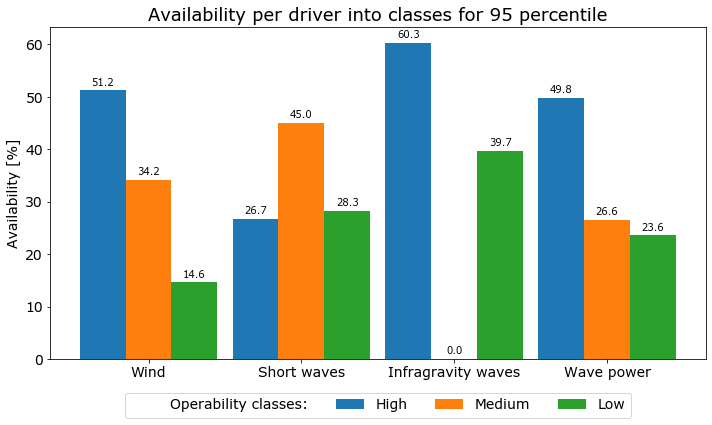

In [378]:
wind_low = round(np.sum(data6.wind95<10.8)/len(data6.wind95)*100,1)
wind_high = round(np.sum(data6.wind95>=13.8)/len(data6.wind95)*100,1)
wind_medium = round(100 - wind_low - wind_high, 1)

wave_low = round(np.sum(data6.swh95<1.5)/len(data6.swh95)*100,1)
wave_high = round(np.sum(data6.swh95>=2.5)/len(data6.swh95)*100,1)
wave_medium = round(100 - wave_low - wave_high, 1)

ig_low = round(np.sum(data6.ig95<0.05)/(len(data6.ig95)-1)*100,1)
ig_high = round(np.sum(data6.ig95>=0.05)/(len(data6.ig95)-1)*100,1)

wavepo_low = round(np.sum(data6.wavePo<1.5)/len(data6.wavePo)*100,1)
wavepo_high = round(np.sum(data6.wavePo>=3.0)/len(data6.wavePo)*100,1)
wavepo_medium = round(100 - wavepo_low - wavepo_high, 1)

labels = ['Wind', 'Short waves', 'Infragravity waves', 'Wave power']
Low = [wind_low, wave_low, ig_low, wavepo_low]
Medium = [wind_medium, wave_medium, 0, wavepo_high]
High = [wind_high, wave_high, ig_high, wavepo_medium]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects0 = ax.bar(x - width, Low, width, color='none', label='Operability classes:')
rects1 = ax.bar(x - width, Low, width, label='High')
rects2 = ax.bar(x, Medium, width, label='Medium')
rects3 = ax.bar(x + width, High, width, label='Low')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Availability [%]', size=14)
ax.set_title('Availability per driver into classes for 95 percentile', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=14)
ax.tick_params(axis='both', labelsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, ncol=5, fontsize=14)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
#plt.savefig('availability_classes_drivers_95p.png', dpi=300, bbox_inches='tight');

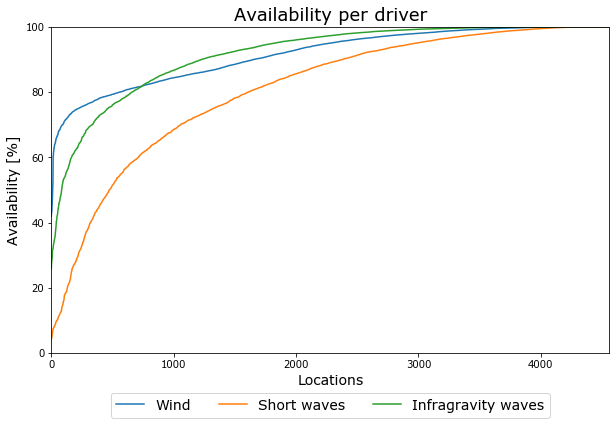

In [172]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.sort(data7.windAvUp), label='Wind')
ax.plot(np.sort(data7.swhAvUp), label='Short waves')
ax.plot(np.sort(data7.igAvUp), label='Infragravity waves')
ax.set_ylabel('Availability [%]', size=14)
ax.set_xlabel('Locations', size=14)
ax.set_title('Availability per driver', fontsize=18)
ax.set_xlim(0,4560)
ax.set_ylim(0,100)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),fancybox=True, ncol=3, fontsize=14)
#plt.savefig('availability_drivers_sorted.png', dpi=300, bbox_inches='tight');